In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator


In [45]:
gdp_pcap = pd.read_csv("data/gdp_pcap.csv", index_col="country")

# drop all years in the future
gdp_pcap.drop(columns=gdp_pcap.columns[gdp_pcap.columns.astype(int) > 2025], inplace=True)

# convert thousand values marked with 'k' into numeric
gdp_pcap[:] = gdp_pcap.apply(lambda s: pd.to_numeric(s.astype(str).str.replace('k', 'e3', regex=False), errors='coerce'))

gdp_pcap.head()


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,481,481,481,481,481,481,481,481,481,481,...,2100.0,2100.0,2060.0,2080.0,1970.0,1520.0,1390.0,1360.0,1330.0,1330.0
Angola,373,374,376,378,379,381,383,385,386,388,...,7490.0,7220.0,6880.0,6600.0,6030.0,5910.0,5910.0,5780.0,5750.0,5760.0
Albania,469,471,472,473,475,476,477,479,480,482,...,12300.0,12800.0,13300.0,13700.0,13300.0,14600.0,15500.0,16200.0,16800.0,17400.0
Andorra,1370,1370,1370,1380,1380,1380,1390,1390,1390,1390,...,57500.0,56400.0,56200.0,56300.0,49700.0,52800.0,56400.0,55300.0,55200.0,55000.0
UAE,1140,1150,1150,1150,1160,1160,1170,1170,1180,1180,...,70900.0,70900.0,71200.0,71500.0,67400.0,69700.0,74600.0,76500.0,78600.0,81300.0


In [46]:
child_mortality = pd.read_csv("data/child_mortality.csv", index_col="country")

# drop all years in the future
child_mortality.drop(columns=child_mortality.columns[child_mortality.columns.astype(int) > 2025], inplace=True)

child_mortality.head()


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,470.0,...,70.60,64.30,61.90,60.50,59.40,57.90,52.80,48.90,48.00,50.10
Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,84.40,81.10,78.00,75.00,72.10,69.40,69.30,68.80,67.60,66.40
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.40,9.34,9.34,9.39,9.44,9.46,9.16,8.93,7.57,7.32
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.35,3.20,3.06,2.95,2.85,2.76,6.21,6.03,5.86,5.70
UAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.42,7.21,7.00,6.79,6.58,6.37,6.23,5.94,5.72,5.51


In [47]:
regions = pd.read_csv("data/regions.csv")

# only keep relevant cols
regions = regions[["name", "four_regions"]].copy()

# set index
regions.set_index("name", inplace=True)

regions.head()


,four_regions
name,
Australia,asia
Brunei,asia
Cambodia,asia
China,asia
Fiji,asia


In [48]:
# add region column
gdp_pcap = gdp_pcap.join(regions.rename(columns={"four_regions": "region"}))
child_mortality = child_mortality.join(regions.rename(columns={"four_regions": "region"}))


In [49]:
# select numeric year columns from 1950 onwards
year_cols = gdp_pcap.columns[gdp_pcap.columns.str.fullmatch(r"\d{4}")]
years = year_cols[year_cols.astype(int) >= 1950]

gdp_panel = gdp_pcap[years].copy()
child_panel = child_mortality[years].copy()

gdp_panel['region'] = gdp_pcap['region']
child_panel['region'] = child_mortality['region']


In [50]:
# convert child mortality values to percentages (per 1000 -> per 100)
child_values = child_panel.drop(columns='region').apply(pd.to_numeric, errors='coerce')
child_percent = (child_values / 1000.0) * 100
child_percent['region'] = child_panel['region']
child_percent.head()


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,region
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,41.80,41.50,40.9,40.20,39.70,38.90,38.30,37.60,37.00,36.30,...,6.430,6.190,6.050,5.940,5.790,5.280,4.890,4.800,5.010,asia
Angola,33.00,32.90,32.7,32.50,32.30,32.10,31.80,31.60,31.30,31.00,...,8.110,7.800,7.500,7.210,6.940,6.930,6.880,6.760,6.640,africa
Albania,NaN,27.50,27.0,26.60,26.20,25.80,25.30,24.90,24.30,23.80,...,0.934,0.934,0.939,0.944,0.946,0.916,0.893,0.757,0.732,europe
Andorra,9.11,9.41,6.7,6.08,5.22,5.37,5.33,5.45,4.08,4.15,...,0.320,0.306,0.295,0.285,0.276,0.621,0.603,0.586,0.570,europe
UAE,NaN,26.80,26.2,25.60,25.00,24.40,23.70,22.90,22.10,21.20,...,0.721,0.700,0.679,0.658,0.637,0.623,0.594,0.572,0.551,NaN


In [51]:
# reshape child mortality percentages into tidy format
child_percent_values = child_percent.drop(columns='region')
child_tidy = (
    child_percent_values.stack().rename('child_mortality_pct').to_frame()
    .reset_index()
    .rename(columns={'level_0': 'country', 'level_1': 'year'})
)
child_tidy['year'] = child_tidy['year'].astype(int)
child_tidy['region'] = child_tidy['country'].map(child_percent['region'])
child_tidy = child_tidy.dropna(subset=['child_mortality_pct', 'region'])
child_tidy.head()


,country,year,child_mortality_pct,region
0,Afghanistan,1950,41.8,asia
1,Afghanistan,1951,41.5,asia
2,Afghanistan,1952,40.9,asia
3,Afghanistan,1953,40.2,asia
4,Afghanistan,1954,39.7,asia


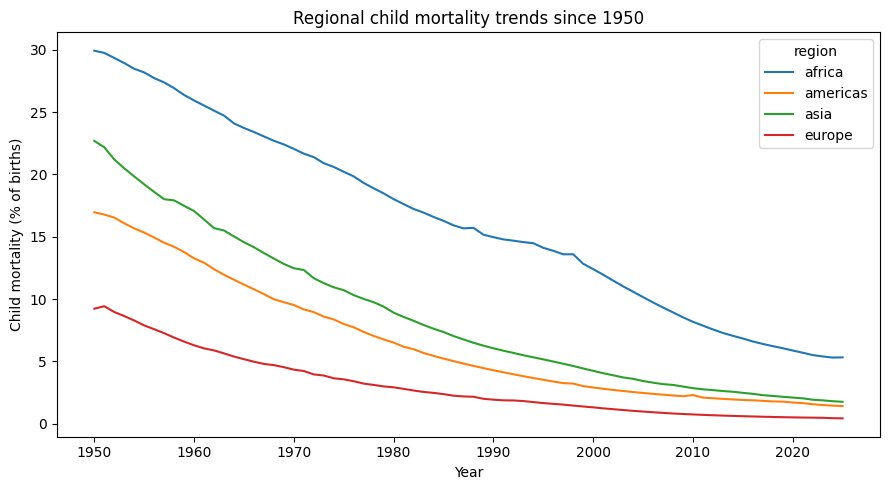

In [52]:
# plot child mortality percentage trends by region since 1950
regional_child = (
    child_tidy.groupby(['region', 'year'])['child_mortality_pct']
    .mean()
    .reset_index()
)

plt.figure(figsize=(9, 5))
sns.lineplot(data=regional_child, x='year', y='child_mortality_pct', hue='region')
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xlabel('Year')
plt.ylabel('Child mortality (% of births)')
plt.title('Regional child mortality trends since 1950')
plt.tight_layout()


In [53]:
# combine GDP and child mortality for correlation analysis
gdp_values = gdp_panel.drop(columns='region')
gdp_tidy = (
    gdp_values.stack().rename('gdp').to_frame()
    .reset_index()
    .rename(columns={'level_0': 'country', 'level_1': 'year'})
)
gdp_tidy['year'] = gdp_tidy['year'].astype(int)

combined = (
    child_tidy
    .merge(gdp_tidy[['country', 'year', 'gdp']], on=['country', 'year'], how='inner')
    .dropna(subset=['gdp', 'region'])
)
combined['gdp'] = pd.to_numeric(combined['gdp'], errors='coerce')
combined = combined.dropna(subset=['gdp'])
combined.head()


,country,year,child_mortality_pct,region,gdp
0,Afghanistan,1950,41.8,asia,1450.0
1,Afghanistan,1951,41.5,asia,1500.0
2,Afghanistan,1952,40.9,asia,1540.0
3,Afghanistan,1953,40.2,asia,1620.0
4,Afghanistan,1954,39.7,asia,1650.0


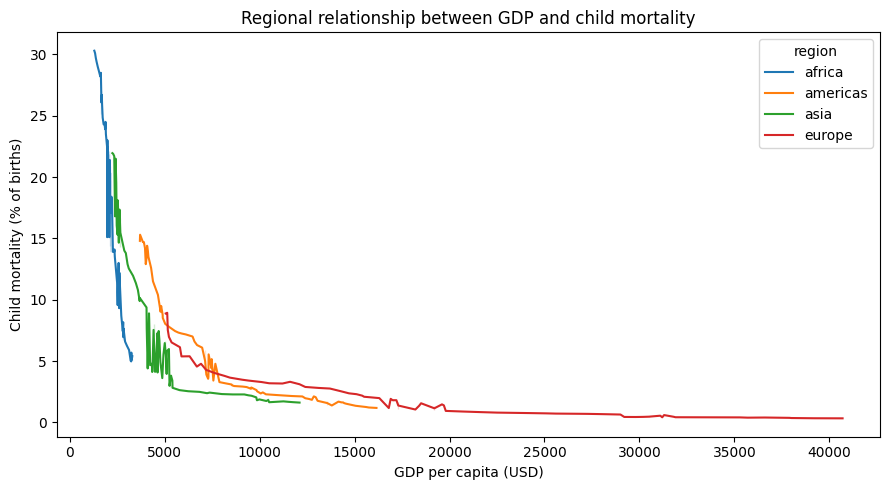

In [54]:
# correlate GDP and child mortality over time with region grouping
regional_combined = (
    combined.groupby(['region', 'year'])[['child_mortality_pct', 'gdp']].median().reset_index()
)

plt.figure(figsize=(9, 5))
sns.lineplot(
    data=regional_combined,
    x='gdp',
    y='child_mortality_pct',
    hue='region'
)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Child mortality (% of births)')
plt.title('Regional relationship between GDP and child mortality')
plt.tight_layout()
